In [ ]:
!gdown --folder https://drive.google.com/drive/folders/14Lu-2zt-TAenXlykysJoFkvAME_S1DiV

Retrieving folder list
Processing file 1TL3VyMGWUTwFsOpAjf94DpE24owB7Yrl DataDictionary.JPG
Processing file 1fagg63RRXRVPTWjiArc1vqfsEmIhsqGE test_data_cl_v2.csv
Processing file 1KhSfjJkPsRdnROXaHmy9ObIBHWe3x_iE test_data_GroundTruth_cl.csv
Processing file 1bL6wYAQqXr6rAmhxSF3gYEjZhXnAcbAY train_data_cl_v2.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1TL3VyMGWUTwFsOpAjf94DpE24owB7Yrl
To: /content/Perceptron Challenge Dataset/DataDictionary.JPG
100% 62.7k/62.7k [00:00<00:00, 95.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fagg63RRXRVPTWjiArc1vqfsEmIhsqGE
To: /content/Perceptron Challenge Dataset/test_data_cl_v2.csv
100% 23.2k/23.2k [00:00<00:00, 59.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KhSfjJkPsRdnROXaHmy9ObIBHWe3x_iE
To: /content/Perceptron Challenge Dataset/test_data_GroundTruth_cl.csv
100% 2.58k/2.58k [00:00<00:00, 13.5MB/s]
Downloading.

In [ ]:
from torch.utils.data import DataLoader, Dataset, TensorDataset

class TitanicDataset:
    def __init__(self, data, data_prep_version='1'):
        self.data_prep_version = data_prep_version
        self.data = self._data_preprocessing(data)

    def _data_preprocessing(self, data):
        if self.data_prep_version == '1':
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()

            out = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
            out['Sex'] = le.fit_transform(out['Sex'])
            out['Embarked'] = le.fit_transform(out['Embarked'])
            return out

        elif self.data_prep_version == '2':
            dummy_fields=['Sex', 'Embarked']
            for each in dummy_fields:
                dummies= pd.get_dummies(data[each], prefix= each, drop_first=False)
                data = pd.concat([data, dummies], axis=1)

            fields_to_drop=['PassengerId', 'Cabin', 'Name', 'Sex', 'Ticket', 'Embarked']
            out = data.drop(fields_to_drop, axis=1)
            return out

        elif self.data_prep_version == '3':
            dummy_fields=['Sex', 'Embarked']
            for each in dummy_fields:
                dummies= pd.get_dummies(data[each], prefix= each, drop_first=False)
                data = pd.concat([data, dummies], axis=1)

            fields_to_drop=['PassengerId', 'Cabin', 'Name', 'Sex', 'Ticket', 'Embarked']
            out = data.drop(fields_to_drop, axis=1)
            out['FamilySize'] = out['SibSp'] + out['Parch'] + 1
            return out

        else:
            pass

    def as_df(self):
        return self.data

In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/Perceptron Challenge Dataset/train_data_cl_v2.csv')
df_test = pd.read_csv('/content/Perceptron Challenge Dataset/test_data_cl_v2.csv')
df_gt = pd.read_csv('/content/Perceptron Challenge Dataset/test_data_GroundTruth_cl.csv')
df_test = pd.concat([df_gt, df_test], axis=1)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = TitanicDataset(df_test, '1').as_df()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


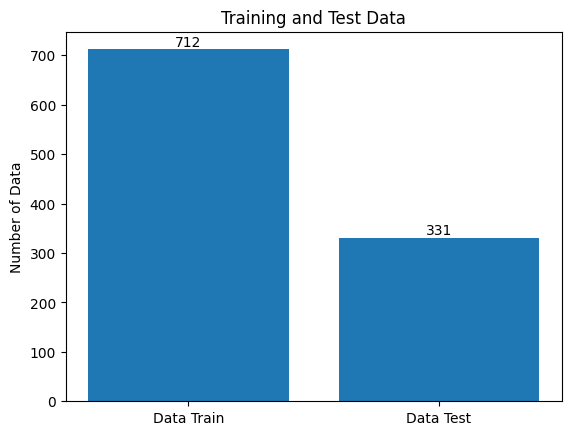

In [ ]:
import matplotlib.pyplot as plt

bar_labels = ["Data Train", "Data Test"]
bar_data = [len(df_train), len(df_test)]

fig, ax = plt.subplots()
ax.bar(bar_labels, bar_data)

for i, v in enumerate(bar_data):
    ax.text(i, v + 6, str(v), ha='center')

ax.set_ylabel('Number of Data')
plt.title('Training and Test Data')

plt.show()

In [ ]:
import torch
from torch import nn

torch.manual_seed(42)

class Perceptron(nn.Module):
    def __init__(self,
                 in_features: int,
                 out_features: int,
                 bias: bool =True):
        super().__init__()
        self.node = nn.Linear(
            in_features=in_features,
            out_features=out_features,
            bias=bias
        )
        self.act_func = nn.Sigmoid()

    def forward(self, x):
        out = self.node(x)
        return self.act_func(out)

p = Perceptron(10, 1)
p.state_dict()

OrderedDict([('node.weight',
              tensor([[ 0.2418,  0.2625, -0.0741,  0.2905, -0.0693,  0.0638, -0.1540,  0.1857,
                        0.2788, -0.2320]])),
             ('node.bias', tensor([0.2749]))])

In [ ]:
import os
from tqdm.auto import tqdm

torch.manual_seed(42)

data_version = '2'
batch_size = 16
epochs = 20
lr = 0.01
lr_scheduler_step = 4

def accuracy(logits, target, t):
    logits[logits < t] = 0
    logits[logits >= t] = 1

    return sum(logits == target) / len(target)

def train(model,
          train_dataloader,
          test_dataloader,
          loss_fn,
          optimizer,
          lr_scheduler=None,
          epochs=20,
          show_progress=True,
          device='cpu'):

    config = {
        'activation': model.act_func.__class__.__name__,
        'loss_function': loss_fn.__class__.__name__,
        'optimizer': optimizer.__class__.__name__,
        'batch_size': batch_size,
        'epochs': epochs,
        'learning_rate': optimizer.param_groups[0]['lr'],
        'lr_scheduler_step': scheduler.step_size
    }

    result = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = 0, 0

        model.to(device)
        # train mode
        model.train()
        for data in train_dataloader:
            # move data to available device (cpu/cuda)
            X, y = data[:, 1:].to(device), data[:, 0].to(device)

            # forward
            logits = model(X).squeeze(1)

            # backward
            loss = loss_fn(logits, y) # error
            optimizer.zero_grad() # reset gradient
            loss.backward() # count gradient
            optimizer.step() # perform update weights

            # accuracy
            acc = accuracy(logits, y, 0.5)

            # acumulate loss and accuracy
            train_loss += loss.item()
            train_acc += acc.item()

        test_loss, test_acc = 0, 0

        # eval mode
        model.eval()
        for data_test in test_dataloader:
            X_test, y_test = data_test[:, 1:].to(device), data_test[:, 0].to(device)

            with torch.inference_mode():
                test_logits = model(X_test).squeeze(1)
                test_loss += loss_fn(test_logits, y_test).item()
                test_acc += accuracy(test_logits, y_test, 0.5).item()

        train_loss, train_acc = train_loss / len(train_dataloader), train_acc / len(train_dataloader)
        test_loss, test_acc = test_loss / len(test_dataloader), test_acc / len(test_dataloader)

        if lr_scheduler is not None:
            lr_scheduler.step()

        result['train_loss'].append(train_loss)
        result['train_acc'].append(train_acc)
        result['test_acc'].append(test_acc)
        result['test_loss'].append(test_loss)

        if show_progress:
            print(f"Epoch: {epoch+1:4d}/{epochs}",
                f"| Train Loss: {train_loss:.4f}",
                f"| Train Acc: {train_acc:.3%}",
                f"| Test Loss: {test_loss:.4f}",
                f"| Test Acc: {test_acc:.3%}"
            )

        torch.save(model.state_dict(), f'models/model_{epoch + 1}.pth')

    return result, config



df_train_final = TitanicDataset(df_train, str(data_version)).as_df()
df_test_final = TitanicDataset(df_test, str(data_version)).as_df()

train_ds = torch.Tensor(df_train_final.values)
test_ds = torch.Tensor(df_test_final.values)

train_dataloader = DataLoader(
    train_ds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

test_dataloader = DataLoader(
    test_ds,
    batch_size=batch_size,
    num_workers=2
)

model = Perceptron(df_train_final.shape[-1]-1, 1, bias=True)
os.makedirs('models', exist_ok=True)

loss_fn = nn.BCELoss() # error
optimizer = torch.optim.Adam(params=model.parameters() , lr=lr) # update weights
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_scheduler_step, gamma=0.1) # scale down lr

result, config = train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    epochs=epochs,
    loss_fn=loss_fn,
    optimizer=optimizer,
    lr_scheduler=scheduler
)


## Putting All Together

In [ ]:
import torch
import os
import json
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np

from torch import optim
from torch import nn
from tqdm.auto import tqdm
from huggingface_hub import HfApi


torch.manual_seed(42)

device = 'cpu'

def accuracy(logits, target, t):
    logits[logits < t] = 0
    logits[logits >= t] = 1
    return sum(logits == target) / len(target)

def train(model,
        train_dataloader,
        test_dataloader,
        batch_size,
        loss_fn,
        optimizer,
        lr_scheduler=None,
        epochs=20,
        show_progress=True,
        data_version=1,
        device='cpu'):

    config = {
        'activation': model.act_func.__class__.__name__,
        'loss_function': loss_fn.__class__.__name__,
        'optimizer': optimizer.__class__.__name__,
        'batch_size': batch_size,
        'epochs': epochs,
        'learning_rate': optimizer.param_groups[0]['lr'],
        'lr_scheduler_step': lr_scheduler.step_size
    }

    dir = f'/content/experiment/dataV{data_version}/' + '/'.join([f'{k}_{v}' for k, v in config.items()])
    try:
        os.makedirs(dir + '/models', exist_ok=False)

        result = {
            'train_loss': [],
            'train_acc': [],
            'test_loss': [],
            'test_acc': []
        }

        for epoch in range(epochs):
            train_loss, train_acc = 0, 0

            model.to(device)
            # train mode
            model.train()
            for data in train_dataloader:
                # move data to available device (cpu/cuda)
                X, y = data[:, 1:].to(device), data[:, 0].to(device)

                # forward
                logits = model(X).squeeze(1)

                # backward
                loss = loss_fn(logits, y) # error
                optimizer.zero_grad() # reset gradient
                loss.backward() # count gradient
                optimizer.step() # perform update weights

                # accuracy
                acc = accuracy(logits, y, 0.5)

                # acumulate loss and accuracy
                train_loss += loss.item()
                train_acc += acc.item()

            test_loss, test_acc = 0, 0

            # eval mode
            model.eval()
            for data_test in test_dataloader:
                X_test, y_test = data_test[:, 1:].to(device), data_test[:, 0].to(device)

                with torch.inference_mode():
                    test_logits = model(X_test).squeeze(1)
                    test_loss += loss_fn(test_logits, y_test).item()
                    test_acc += accuracy(test_logits, y_test, 0.5).item()

            train_loss, train_acc = train_loss / len(train_dataloader), train_acc / len(train_dataloader)
            test_loss, test_acc = test_loss / len(test_dataloader), test_acc / len(test_dataloader)

            if lr_scheduler is not None:
                lr_scheduler.step()

            result['train_loss'].append(train_loss)
            result['train_acc'].append(train_acc)
            result['test_acc'].append(test_acc)
            result['test_loss'].append(test_loss)

            torch.save(model.state_dict(), f'{dir}/models/model_{epoch + 1}.pth')

        print(dir)
        return result, config, dir

    except Exception as e:
        print(e)

def get_loss_func(loss_func):
    if loss_func == 'mse':
        return nn.MSELoss()
    elif loss_func == 'cross_entropy':
        return nn.CrossEntropyLoss()
    elif loss_func == 'bce':
        return nn.BCELoss()
    elif loss_func == 'l1':
        return nn.L1Loss()
    else:
        raise ValueError(f'Unsupported loss function: {loss_func}')

def get_optimizer(model, optimizer_name, lr=0.001):
    if optimizer_name == 'adam':
        return optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == 'sgd':
        return optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == 'adagrad':
        return optim.Adagrad(model.parameters(), lr=lr)
    elif optimizer_name == 'rmsprop':
        return optim.RMSprop(model.parameters(), lr=lr)
    elif optimizer_name == 'adadelta':
        return optim.Adadelta(model.parameters(), lr=lr)
    elif optimizer_name == 'adamw':
        return optim.AdamW(model.parameters(), lr=lr)
    elif optimizer_name == 'nadam':
        return optim.NAdam(model.parameters(), lr=lr)
    elif optimizer_name == 'radam':
        return optim.RAdam(model.parameters(), lr=lr)
    else:
        raise ValueError('Unsupported optimizer')

def plot_loss_and_acc(result, dir):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(result['train_loss'], label='Train Loss')
    ax1.plot(result['test_loss'], label='Test Loss')
    ax1.set_title('Train')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(result['train_acc'], label='Train Accuracy')
    ax2.plot(result['test_acc'], label='Test Accuracy')
    ax2.set_title('Test')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    fig.tight_layout()
    fig.savefig(f'{dir}/result.jpg', format='jpg')
    plt.close(fig)

def plot_feature_importances(model, df_train, dir):

    weights = model.node.weight.softmax(1).squeeze(0).cpu().detach().numpy()
    columns = df_train.columns[1:]

    items = dict(sorted(({c: w for c, w in zip(columns, weights)}).items(),
                    key=lambda x: x[-1],
                    reverse=True))

    plt.barh(list(items.keys()), items.values(), color='blue')
    plt.xlabel("Weight Magnitude")
    plt.gca().invert_yaxis()
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.savefig(f"{dir}/feature_important.jpg", format='jpg', bbox_inches='tight')
    plt.close()

def experiment(
    data_version,
    act_func,
    loss_fn,
    optimizer,
    batch_size,
    epochs,
    lr,
    lr_scheduler_step
):

    df_train_final = TitanicDataset(df_train, str(data_version)).as_df()
    df_test_final = TitanicDataset(df_test, str(data_version)).as_df()


    class Perceptron(nn.Module):
        def __init__(self, in_features: int, out_features: int, bias: bool = True, act_func: str = 'sigmoid'):
            super().__init__()
            self.node = nn.Linear(
                in_features=in_features,
                out_features=out_features,
                bias=bias
            )

            self.act_func = self.get_act_func(act_func)

        def get_act_func(self, act_func):
            if act_func == 'sigmoid':
                return nn.Sigmoid()
            elif act_func == 'relu':
                return nn.ReLU()
            elif act_func == 'leaky_relu':
                return nn.LeakyReLU()
            elif act_func == 'tanh':
                return nn.Tanh()
            elif act_func == 'gelu':
                return nn.GELU()
            elif act_func == 'hard_sigmoid':
                return nn.Hardsigmoid()
            else:
                raise ValueError(f'Unsupported activation function: {act_func}')

        def forward(self, x):
            out = self.node(x)
            return self.act_func(out)


    df_train_final = TitanicDataset(df_train, str(data_version)).as_df()
    df_test_final = TitanicDataset(df_test, str(data_version)).as_df()

    train_ds = torch.Tensor(df_train_final.values)
    test_ds = torch.Tensor(df_test_final.values)

    train_dataloader = DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2
    )

    test_dataloader = DataLoader(
        test_ds,
        batch_size=batch_size,
        num_workers=2
    )

    try:
        model = Perceptron(df_train_final.shape[-1]-1, 1, bias=True, act_func=act_func).to(device)
        loss_fn = get_loss_func(loss_fn)
        optimizer = get_optimizer(model, optimizer, lr=lr)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_scheduler_step, gamma=0.1)

        result, config, dir = train(
            model=model,
            batch_size=batch_size,
            train_dataloader=train_dataloader,
            test_dataloader=test_dataloader,
            epochs=epochs,
            loss_fn=loss_fn,
            optimizer=optimizer,
            data_version=data_version,
            lr_scheduler=scheduler,
            device='cpu'
        )

        plot_loss_and_acc(result, dir)
        plot_feature_importances(model, df_train_final, dir)

        result_object = json.dumps(result, indent=4)
        config_object = json.dumps(config, indent=4)

        with open(f"{dir}/result.json", "w") as outfile:
            outfile.write(result_object)

        with open(f"{dir}/config.json", "w") as outfile:
            outfile.write(config_object)

    except Exception as e:
        print(e)


In [ ]:
experiment_config = dict(
    data_version = ['1', '2', '3'],
    act_func = ['sigmoid', 'relu', 'leaky_relu', 'tanh', 'gelu', 'hard_sigmoid'],
    loss_fn = ['mse', 'cross_entropy', 'bce', 'l1'],
    optimizer = ['adam', 'sgd', 'adagrad', 'rmsprop', 'adadelta', 'adamw', 'nadam', 'radam'],
    batch_size = [8, 16, 32, 64],
    epochs = [10, 15, 20, 30, 50],
    lr = [0.1, 0.01, 0.001,
        0.2, 0.02, 0.002,
        0.3, 0.03, 0.003,
        0.4, 0.04, 0.004,
        0.5, 0.05, 0.005,
        0.06, 0.006,
        0.07, 0.007,
        0.08, 0.008,
        0.09, 0.009],
    lr_scheduler_step = [4, 5, 8]
)

for _ in tqdm(range(100)):
    random_experiment = {
        key: random.choice(value)
        for key, value in experiment_config.items()
    }
    experiment(**random_experiment)

In [ ]:
from huggingface_hub import login
from google.colab import userdata

login(userdata.get('hf_token'), add_to_git_credential=True)

Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import os
import transformers
from huggingface_hub import snapshot_download

transformers.utils.logging.disable_progress_bar()
repo_id = "JST4/Experiment"

expe_dir = snapshot_download(repo_id=repo_id, repo_type="dataset", local_dir='/content/experiment')

for dir in os.listdir(expe_dir):
    if not os.path.isdir(dir):
        try:
            os.remove(f'{expe_dir}/{dir}')
        except:
            pass

In [ ]:
!unzip -q /content/drive/MyDrive/experiment.zip -d .
!cp -R /content/content/* /content
!rm -R /content/content

In [ ]:
import json
import numpy as np
import pandas as pd
import shutil
import os


best_results = []
expe_dir = '/content/experiment/'

for dir in (os.walk(expe_dir)):
    if ('lr_scheduler_step' in dir[0]) and 'models' not in dir[0]:
        try:
            with open(f'{dir[0]}/result.json', 'r') as f:
                res = json.load(f)

            with open(f'{dir[0]}/config.json', 'r') as f:
                conf = json.load(f)

            loss_acu = np.array(res['train_loss']) + np.array(res['test_loss'])
            acc_acu = np.array(res['train_acc']) + np.array(res['test_acc'])

            res_acu = acc_acu - loss_acu
            best_at_epoch = np.argmax(res_acu)
            score = res_acu[best_at_epoch]

            res_copy = {k:res[k][best_at_epoch] for k, _ in res.items()}
            res_copy['best_at_epoch'] = best_at_epoch + 1
            res_copy['score'] = (res_copy['train_acc'] + res_copy['test_acc']) / 2

            conf.update(res_copy)
            datav = {'data': dir[0].split('/')[3]}
            datav.update(conf)

            res_image = 'https://huggingface.co/datasets/JST4/Experiment/resolve/main/' + '/'.join(dir[0].split('/')[3:]) + '/result.jpg?download=true'
            fi_image = 'https://huggingface.co/datasets/JST4/Experiment/resolve/main/' + '/'.join(dir[0].split('/')[3:]) + '/feature_important.jpg?download=true'

            urls = {
                'res_url': f'=IMAGE("{res_image}", 4, 300, 700)',
                'fi_url': f'=IMAGE("{fi_image}", 4, 300, 400)',
            }

            datav.update(urls)

            best_results.append(datav)

        except Exception as e:
            # shutil.rmtree(dir[0])
            pass

df_res = pd.DataFrame(best_results)
df_res.sort_values('score', ascending=False, inplace=True, ignore_index=True)
df_res = df_res.iloc[2:, :].reset_index()
df_res.drop(['index'], inplace=True, axis=1)
df_res

,data,activation,loss_function,optimizer,batch_size,epochs,learning_rate,lr_scheduler_step,train_loss,train_acc,test_loss,test_acc,best_at_epoch,score,res_url,fi_url
0,dataV2,Sigmoid,BCELoss,Adam,16,20,0.010,4,0.472579,0.781944,0.264192,0.991071,17,0.886508,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
1,dataV2,Sigmoid,BCELoss,Adam,32,20,0.010,4,0.480504,0.783967,0.270149,0.988636,17,0.886302,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
2,dataV3,Sigmoid,BCELoss,Adam,16,20,0.010,4,0.473337,0.783333,0.263376,0.988095,17,0.885714,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
3,dataV3,Sigmoid,BCELoss,Adam,32,20,0.010,4,0.482193,0.779891,0.269140,0.991477,17,0.885684,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
4,dataV3,Sigmoid,BCELoss,RMSprop,32,20,0.050,8,0.476491,0.800272,0.223508,0.969008,14,0.884640,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,dataV1,Sigmoid,L1Loss,Adadelta,8,10,0.001,8,0.651172,0.345506,0.632829,0.371032,10,0.358269,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
379,dataV1,ReLU,L1Loss,Adadelta,8,10,0.009,4,2.758045,0.321629,2.344510,0.382937,10,0.352283,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
380,dataV3,ReLU,L1Loss,Adadelta,32,15,0.300,4,1.774708,0.315217,1.501376,0.385589,13,0.350403,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."
381,dataV1,Hardsigmoid,BCELoss,Adam,64,20,0.006,4,3.196763,0.332031,4.422832,0.360085,18,0.346058,"=IMAGE(""https://huggingface.co/datasets/JST4/E...","=IMAGE(""https://huggingface.co/datasets/JST4/E..."


In [ ]:
df_res.to_excel('experiment.xlsx')

In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset, DatasetDict

dataset_hf = Dataset.from_pandas(df_res, split='result')
dataset_hf.push_to_hub('JST4/Experiment')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/903 [00:00<?, ?B/s]

In [ ]:
!rm -R /content/drive/MyDrive/experiment.zip
!zip -r experiment.zip /content/experiment -q
!cp -R experiment.zip /content/drive/MyDrive/

In [ ]:
api = HfApi()
api.upload_folder(
    folder_path='experiment',
    repo_id="JST4/Experiment",
    repo_type="dataset",
)